# Image Segmentation and Thresholding with OpenCV

### Introduction
This notebook teaches you the fundamental concepts of image segmentation and thresholding using OpenCV.

**You will learn:**
1. How to create and manipulate synthetic grayscale images.
2. Simple and advanced thresholding techniques, including Otsu's and adaptive thresholding.
3. Legacy image segmentation techniques like Canny edge detection, region growing, and the watershed algorithm.
4. Tips for error handling and best practices for real-world image processing.

**What is Thresholding?**
- Thresholding is one of the simplest and most widely used image segmentation techniques.
- It works by converting a grayscale image into a binary image based on a threshold value.
- Pixels above a certain intensity level are set to white, while those below are set to black (or vice versa).

 **Why is Segmentation Important?**
- Simplifies images for analysis by removing irrelevant information.
- Often serves as a preprocessing step for object detection, OCR, and medical imaging tasks.

**Prerequisites**
- Python 3.x
- OpenCV version >= 4.0
- Matplotlib for visualizations

**Ensure you have the required libraries installed using:**

!pip install opencv-python matplotlib numpy




In [1]:
# !pip install opencv-python-headless matplotlib numpy

In [2]:
try:
    import cv2
    import numpy as np
    import matplotlib.pyplot as plt
except ModuleNotFoundError as e:
    print("A required module is missing. Install the necessary dependencies using the following:")
    print("pip install opencv-python-headless matplotlib numpy")
    raise e


In [3]:

# Check library versions
print(f"OpenCV Version: {cv2.__version__}")

OpenCV Version: 4.10.0


### Step 2: Generate a Synthetic Grayscale Image
To ensure reproducibility, we will create a synthetic image with simple shapes.

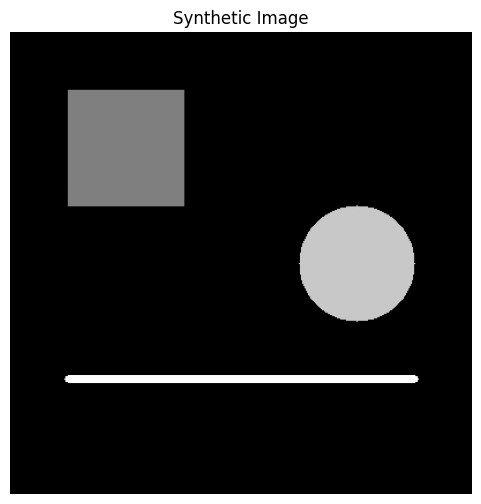

In [4]:
# Create a blank grayscale image
image = np.zeros((400, 400), dtype=np.uint8)

# Add shapes: rectangle, circle, and line
cv2.rectangle(image, (50, 50), (150, 150), 127, -1)  # Gray rectangle
cv2.circle(image, (300, 200), 50, 200, -1)           # Light gray circle
cv2.line(image, (50, 300), (350, 300), 255, 5)       # White line

# Display the synthetic image
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title("Synthetic Image")
plt.axis("off")
plt.show()

### Step 3: Simple Thresholding
- Converts pixel values above/below a threshold to white/black.
- Easy to use for images with uniform lighting.

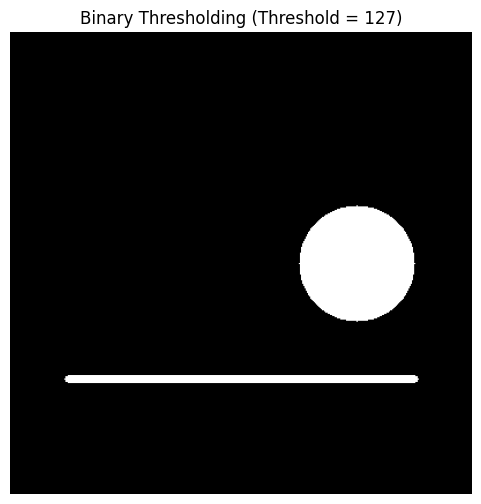

In [5]:
# Apply basic binary thresholding
threshold_value = 127
_, binary_thresh = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

# Display the result
plt.figure(figsize=(6, 6))
plt.imshow(binary_thresh, cmap='gray')
plt.title(f"Binary Thresholding (Threshold = {threshold_value})")
plt.axis("off")
plt.show()

### Step 4: Otsu's Thresholding
- Otsu's method calculates an optimal threshold value automatically.
- Useful for images with bimodal intensity distributions (two distinct peaks in intensity histogram).

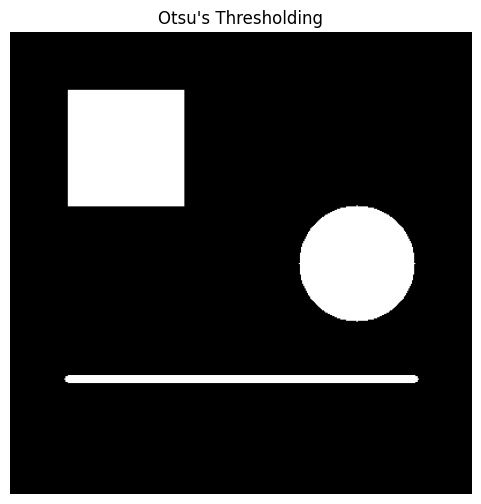

In [6]:
# Apply Otsu's thresholding
_, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the result
plt.figure(figsize=(6, 6))
plt.imshow(otsu_thresh, cmap='gray')
plt.title("Otsu's Thresholding")
plt.axis("off")
plt.show()

### Step 5: Adaptive Thresholding
- Adaptive thresholding calculates thresholds for smaller regions of the image.
- Handles varying lighting conditions effectively.
- Two methods: Mean and Gaussian.

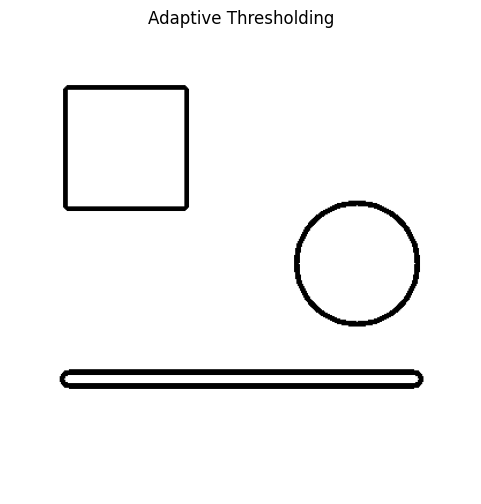

In [7]:
# Apply adaptive thresholding
adaptive_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Display the result
plt.figure(figsize=(6, 6))
plt.imshow(adaptive_thresh, cmap='gray')
plt.title("Adaptive Thresholding")
plt.axis("off")
plt.show()

### Step 6: Edge Detection with Canny
- Edge detection identifies object boundaries by detecting sharp intensity changes.
- The Canny algorithm uses gradients and requires two thresholds: lower and upper bounds.

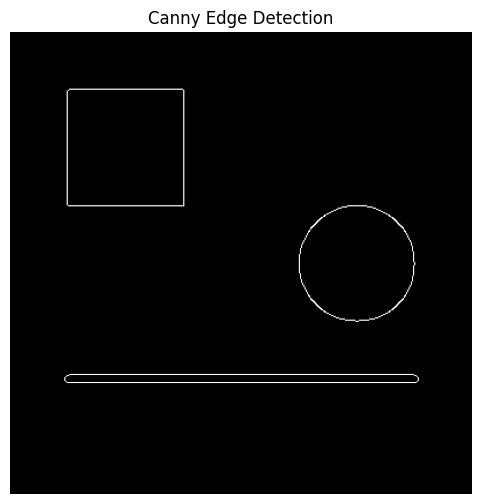

In [8]:
# Apply Canny edge detection
edges = cv2.Canny(image, 100, 200)

# Display the edges
plt.figure(figsize=(6, 6))
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis("off")
plt.show()

### Step 7: Region Growing
- Region growing expands from a seed point to segment regions based on pixel similarity.

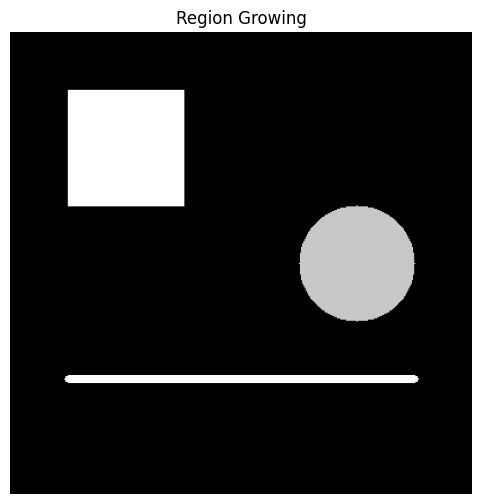

In [9]:
# Define a seed point
seed_point = (100, 100)

# Create a mask for flood fill
mask = np.zeros((402, 402), np.uint8)  # Add 2-pixel border for floodFill
mask[1:-1, 1:-1] = 0  # Initialize the mask

# Perform flood fill for region growing
flood_filled = image.copy()
cv2.floodFill(flood_filled, mask, seed_point, 255, loDiff=5, upDiff=5)

# Display the region-grown image
plt.figure(figsize=(6, 6))
plt.imshow(flood_filled, cmap='gray')
plt.title("Region Growing")
plt.axis("off")
plt.show()

### Step 8: Watershed Algorithm
- The watershed algorithm segments overlapping objects by treating the image as a topographic surface.

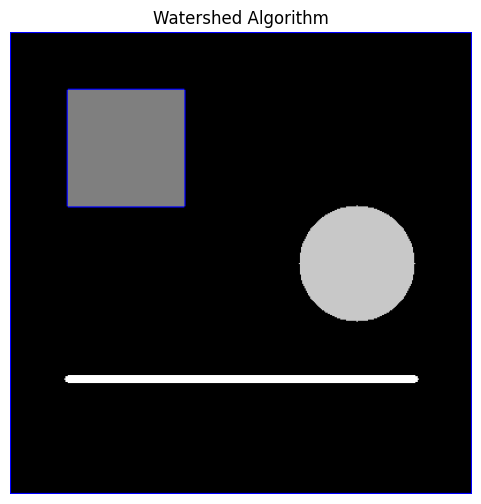

In [10]:
# Convert to color for watershed
color_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Create markers for watershed
markers = np.zeros_like(image, dtype=np.int32)
markers[50:150, 50:150] = 1  # Marker for rectangle
markers[250:350, 150:250] = 2  # Marker for circle

# Apply the watershed algorithm
cv2.watershed(color_image, markers)

# Highlight boundaries
color_image[markers == -1] = [0, 0, 255]

# Display the watershed result
plt.figure(figsize=(6, 6))
plt.imshow(color_image)
plt.title("Watershed Algorithm")
plt.axis("off")
plt.show()

### Step 9: Comparison of Techniques
Let's compare results for each segmentation method.

**Insights:**
- Binary Thresholding is fast but requires manual thresholding.
- Otsu’s Thresholding automates this but needs bimodal distributions.
- Adaptive thresholding works for dynamic lighting.
- Canny Edge Detection is great for boundary detection.
- Region growing and Watershed excel at connected objects.

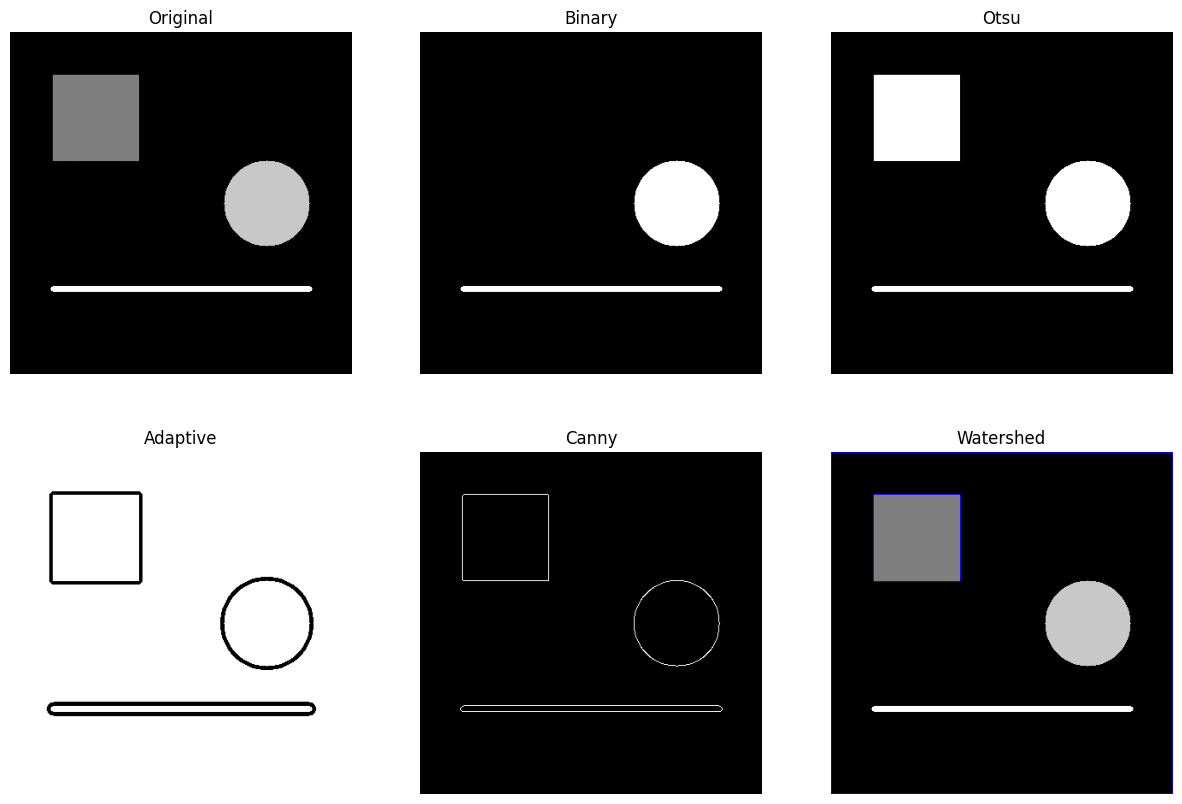

In [11]:
# Comparison visualizations
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(binary_thresh, cmap='gray')
plt.title("Binary")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(otsu_thresh, cmap='gray')
plt.title("Otsu")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title("Adaptive")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(edges, cmap='gray')
plt.title("Canny")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.imshow(color_image)
plt.title("Watershed")
plt.axis("off")

plt.show()

**Error Handling and Tips**
- Ensure the input image is in grayscale before applying thresholding or edge detection.
- Experiment with parameters (e.g., thresholds, block sizes, etc.) for optimal results.
- For the watershed algorithm, carefully define markers to achieve meaningful segmentation.

**Summary**
- Thresholding is a simple yet effective segmentation technique.
- Advanced methods like edge detection, region growing, and the watershed algorithm provide additional flexibility.
- Use these methods based on the specific requirements of your application.
